###### Problem Set 1, due January 10th at 5:30pm 


###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download IMT574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [23]:
# #IPython is what you are using now to run the notebook
# import IPython
# print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Numpy version:        1.15.4 (need at least 1.7.1)
SciPy version:         1.1.0 (need at least 0.12.0)
Pandas version:       0.23.4 (need at least 0.11.0)
Mapltolib version:     3.0.2 (need at least 1.2.1)
Scikit-Learn version: 0.20.1 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.
Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# read data
flights_df= pd.read_csv('flights.csv')

In [26]:
# print summary details and statistics of the data
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [27]:
a = flights_df.dest.unique()
print(a)
flights_df.head(10)
flights_df.year.unique() # re-verify that entire data only for 2013 year

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


array([2013])

##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [28]:
# number of flights from NYC to specific Seattle destination
flights_df1=flights_df[ flights_df.dest=='SEA']
flights_df1.shape[0]

3923

 There were 3923 flights from NYC airports to Seattle in 2013.

(b) How many airlines fly from NYC to Seattle?

In [29]:
# Airlines flying from NYC to Seattle
carriersN_to_seattle = flights_df1.carrier.unique()
print(carriersN_to_seattle)

['AS' 'DL' 'UA' 'B6' 'AA']


5 flights fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [30]:
# Unique airplanes based on tailnum from NYC to Seattle
flights_df1['tailnum'].nunique()


935

935 unique air planes fly from NYC to Seattle.

(d) What is the average arrival delay for flights from NYC to Seattle?

In [31]:
flights_df1['arr_delay'].mean()

-1.0990990990990992

The average arrival delay for flights from NYC to Seattle is -1.099 minutes. This means the flights on average arrive 1.099 minutes early. 

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [32]:
# find unique origins
nyc_origins = flights_df1['origin'].unique() #list of airports in NYC

flights_df1.describe() #find summary of dataframe
# flights_df1.isna()
flights_df1.columns[flights_df1.isna().any()].tolist() #names of columns that have NA values

print ("\n",flights_df1.groupby(['origin']).size(),"\n")

# Method 1 - iterating over each value in list of NYC airports
for i in range(0, len(nyc_origins)):
    num = flights_df1[flights_df1['origin'] == nyc_origins[i]].shape[0]
    proportion = round(num/flights_df1.shape[0], 4) * 100 #calculate percentage
    print('Airport %s has %d flights.' %(nyc_origins[i], num))
    print ('Proportion of flights to Seattle from %s is %.2f%%.' %(nyc_origins[i], proportion), "\n")
    
#Method 2 - groupby origin
num = flights_df1.groupby(['origin']).size().reset_index(name = 'proportion')
num['proportion'] = round(num['proportion']/flights_df1.shape[0],4)
print("Method 2 \n", num)


 origin
EWR    1831
JFK    2092
dtype: int64 

Airport EWR has 1831 flights.
Proportion of flights to Seattle from EWR is 46.67%. 

Airport JFK has 2092 flights.
Proportion of flights to Seattle from JFK is 53.33%. 

Method 2 
   origin  proportion
0    EWR      0.4667
1    JFK      0.5333


Proportion of flights to Seattle from EWR is 0.47 and proportion of flights to Seattle from JFK is 0.53. 

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [33]:
import datetime

flights_df['date'] = pd.to_datetime(flights_df[['year', 'month', 'day']]) #convert to date
flights_df.head()

# To re-verify the results, checking manually for a particular date
flights_df.dep_delay[flights_df['date']=="2013-01-01"].describe()
flights_df.dep_delay[flights_df['date']=="2013-01-01"].dropna().shape[0]
flights_df.dep_delay[flights_df['date']=="2013-01-01"].sum(skipna =True)
flights_df.dep_delay[flights_df['date']=="2013-01-01"].mean(skipna =True)

# Method 1 - create new dataframe with mean based on groupby date
flights_df_avg = flights_df.groupby(['date']).mean().reset_index()
# locate date for the index of the maximum average departure delay value
flights_df_avg.loc[flights_df_avg['dep_delay'].idxmax()].loc['date']

# Method 2 - group by date, output maximum mean of all departure delay, arrival delay independently on each date
flights_df.groupby(['date'])['dep_delay', 'arr_delay'].mean().idxmax()

dep_delay   2013-03-08
arr_delay   2013-03-08
dtype: datetime64[ns]

8th March 2013 had the largest average departure delay as well as the largest arrival delay. 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


2013-03-08 00:00:00


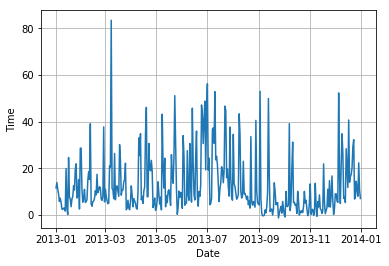

In [34]:
# considering total delay = arrival delay + departure delay
flights_df['total_delay'] = np.where(flights_df['dep_delay'] >= 0, flights_df['dep_delay'], 0) + \
np.where(flights_df['arr_delay'] >= 0, flights_df['arr_delay'], 0)
#365 days since for each day average total delay calculated
flights_df.groupby(['date'])['total_delay'].mean().count() 
print(flights_df.groupby(['date'])['total_delay'].mean().idxmax())
plt.plot(flights_df.groupby(['date'])['dep_delay'].mean())
plt.xlabel("Date")
plt.ylabel("Time")
plt.grid()

The positive values for both the delays indicate delayed flights while negative values indicates that the flights arrived or departed early. The total delay of a day is the sum of both positive delays (for all flights). Here, we will only consider the positive total delays because the negative values for total delay indicates that there was no net delay, there was maybe a delay on either arrival or departure which could be inconvinient for the passengers but is not exactly “delay”. 

Based on the limited information and subjective question, I have assumed that the worst day to fly out is the one with maximum average total delay for the particular day. Therefore, worst day is March 8th 2013. This can be seen from the graph too. 


(c) Are there any seasonal patterns in departure delays for flights from NYC?

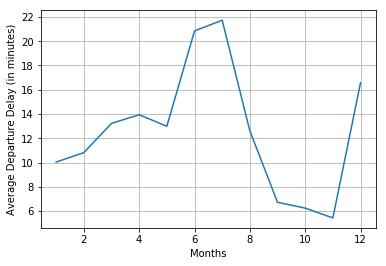

In [35]:
# considering seasonal patterns based on months, groupby month wrt average departure delay in that month
plt.plot(flights_df.groupby(['month'])['dep_delay'].mean())
plt.xlabel("Months")
plt.ylabel("Average Departure Delay (in minutes)")
plt.grid()

Yes, there are seasonal patterns in departure delays for flights from NYC. Considering that May - August is summer vacation and holiday season, many people travel and hence the number of flights increase. Due to large number of flights, the average departure delay in these months is high. For December, average departure delay again increases since it is Christmas break and people often fly out to meet families or go on short vacation. December may have higher departure delay also because of weather conditions. 

(d) On average, how do departure delays vary over the course of a day?

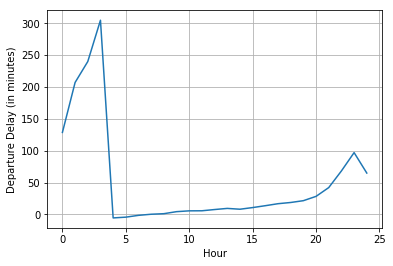

In [36]:
plt.plot(flights_df.groupby(['hour'])['dep_delay'].mean())
plt.xlabel("Hour")
plt.ylabel("Departure Delay (in minutes)")
plt.grid()

We can observe that departure delay is at the peak at 4 am. increases very fast from 12 to 4 AM where its the highest. This maybe attributed to 2 reasons - a) many people in the business industry depart early morning for work and return in the evening after attending meetings/conferences, b) less staff in the early hours. 
Flights 4 am onwards seem to be leaving mostly on time. With increase in air traffic, there is a steady increase in the departure delay post afternoon, with a jump at 11 PM (most people returning back home).

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [37]:
flights_df['speed'] = flights_df['distance']/flights_df['air_time']
#returns the entire row with all details for the max speed observation
flights_df[flights_df['speed']==flights_df['speed'].max()] 
print(flights_df[['carrier', 'tailnum', 'flight']][flights_df.speed == flights_df.speed.max()])

       carrier tailnum  flight
216447      DL  N666DN    1499


Airline DL, Airplane N666DN with flight number 1499 flew the fastest from NYC in 2013.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [38]:
#calculate no. of unique days each flight flew for, out of total 365
flights_df_day_count = flights_df.groupby(['carrier', 'flight', 'dest']).date.nunique().reset_index(name = 'daily_count') 
print("The following flights fly happened every day from NYC in the year 2013:")
flights_df_day_count[flights_df_day_count['daily_count'] == 365] #filter flights that flew daily

The following flights fly happened every day from NYC in the year 2013:


,carrier,flight,dest,daily_count
767,AA,59,SFO,365
775,AA,119,LAX,365
783,AA,181,LAX,365
904,AA,1357,SJU,365
914,AA,1611,MIA,365
1118,B6,219,CLT,365
1147,B6,359,BUR,365
1150,B6,371,FLL,365
1169,B6,431,SRQ,365
1243,B6,703,SJU,365


The flights fly every day to the following destinations:
1. 'SFO' -- San Francisco International Airport (CA)
2. 'LAX'-- Los Angeles International Airport (CA)
3. 'SJU' -- San Juan Airport Hotel (Puerto Rico)
4. 'MIA' -- Miami International Airport (FL)
5. 'CLT' -- Charlotte Douglas International Airport (NC)
6. 'BUR' -- Bob Hope Airport (CA)
7. 'FLL' -- Fort Lauderdale–Hollywood International Airport (FL)
8. 'SRQ' -- Sarasota–Bradenton International Airport (FL)
9. 'MCO' -- Orlando International Airport (FL)
10. 'TPA' -- Tampa International Airport (FL)
11. 'IAD' -- Washington Dulles International Airport (VI)
12. 'HNL' -- Honolulu International Airport 
13. 'LAS' -- McCarran International Airport (CA)

These flights are between NY and the following places: California, Puerto Rico, Florida, North Carolina and Virginia.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


Research Question - With respect to “Total Delay”, which "Airline(s)" have the minimum and maximum delays?

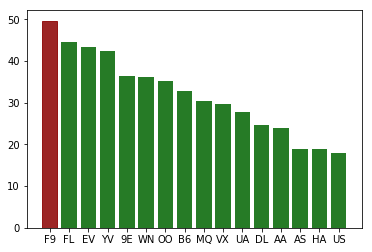

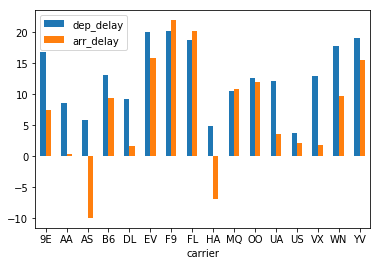

In [39]:
#Average Total Delay grouped by airlines
avg_total_delay = flights_df.groupby(['carrier'])['total_delay'].mean().reset_index()
avg_total_delay = avg_total_delay.sort_values('total_delay', ascending = False)
barplot = plt.bar(avg_total_delay['carrier'], avg_total_delay['total_delay'], color = 'darkgreen', alpha = 0.85)
barplot[0].set_color('darkred')

avg_dep_delay = flights_df.groupby(['carrier'])['dep_delay'].mean().reset_index()
# avg_dep_delay = avg_dep_delay.sort_values('carrier')

avg_arr_delay = flights_df.groupby(['carrier'])['arr_delay'].mean().reset_index()
# avg_arr_delay = avg_arr_delay.sort_values('carrier')

df = pd.DataFrame({'dep_delay': list(avg_dep_delay['dep_delay']), 'arr_delay': list(avg_arr_delay['arr_delay'])}, index=avg_dep_delay['carrier'])
ax = df.plot.bar(rot=0)

 As we can see, F9 i.e. Frontier Airline had the maximum delay in 2013 for the flights from NYC and hence customers can avoid that if they want. 

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [40]:
weather_df= pd.read_csv('weather.csv')
print (weather_df.shape)
print (weather_df.columns)
flights_df['dep_delay'] = flights_df['dep_delay'].apply(lambda x: x if x >=0 else 0)
# alternate way to filter delays:
# flights_df['dep_delay'] = np.where(flights_df['dep_delay']>=0, flights_df['dep_delay'], 0)

flights_df['dep_delay'].describe()
flights_df['arr_delay'] = flights_df['arr_delay'].apply(lambda x: x if x >=0 else 0)
flights_df['total_delay'] = flights_df['dep_delay'] + flights_df['arr_delay']

weather_conditions_df = pd.merge(flights_df, weather_df, how='left', on=['origin','year', 'month', 'day','hour'])
weather_conditions_df.head(10)
weather_conditions_df = weather_conditions_df[['total_delay','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure','visib']]

corr = weather_conditions_df.corr()
corr.style.background_gradient(cmap='Oranges').set_precision(2)

(8719, 15)
Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')


,total_delay,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
total_delay,1,0.072,0.069,0.023,-0.0087,0.024,0.024,0.065,-0.11,-0.12
temp,0.072,1,0.88,0.013,-0.052,-0.04,-0.04,-0.0023,-0.25,0.07
dewp,0.069,0.88,1,0.47,-0.19,-0.088,-0.088,0.069,-0.29,-0.14
humid,0.023,0.013,0.47,1,-0.33,-0.12,-0.12,0.18,-0.16,-0.51
wind_dir,-0.0087,-0.052,-0.19,-0.33,1,0.14,0.14,-0.076,-0.21,0.24
wind_speed,0.024,-0.04,-0.088,-0.12,0.14,1,1,-0.0047,-0.085,0.049
wind_gust,0.024,-0.04,-0.088,-0.12,0.14,1,1,-0.0047,-0.085,0.049
precip,0.065,-0.0023,0.069,0.18,-0.076,-0.0047,-0.0047,1,-0.088,-0.29
pressure,-0.11,-0.25,-0.29,-0.16,-0.21,-0.085,-0.085,-0.088,1,0.11
visib,-0.12,0.07,-0.14,-0.51,0.24,0.049,0.049,-0.29,0.11,1


As seen from the above correlation matrix of the merged dataset from weather and flights, we see that wind_speed and wind_gust are highly correlated to each other. Secondly, total delay is maximum positively related to temprature and dew point as compared to other (though the correlation value is very less), and negatively related to visibility and pressure the highest (compared to others). Hence, with less visibility and less pressure in the air, due to harsh weather conditions, there could be increased flight delays.

In [41]:
corr['total_delay'].sort_values(ascending = False).to_frame().style.background_gradient(cmap='Oranges').set_precision(2)

,total_delay
total_delay,1
temp,0.072
dewp,0.069
precip,0.065
wind_gust,0.024
wind_speed,0.024
humid,0.023
wind_dir,-0.0087
pressure,-0.11
visib,-0.12


Text(0.5, 1.0, 'Visibility vs Total Delay')

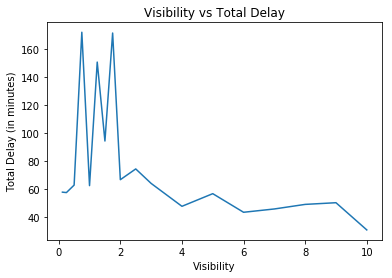

In [42]:
#Visibility vs Total delay
temp = weather_conditions_df.groupby(['visib'])['total_delay'].mean()
plt.plot(temp)
plt.xlabel("Visibility")
plt.ylabel("Total Delay (in minutes)")
plt.title('Visibility vs Total Delay')

Text(0.5, 1.0, 'Pressure vs Total Delay')

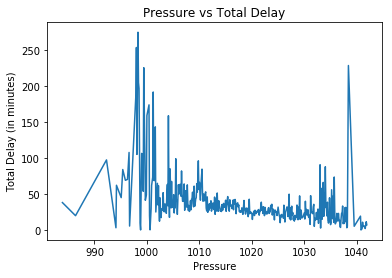

In [43]:
#Pressure vs Total delay
temp = weather_conditions_df.groupby(['pressure'])['total_delay'].mean()
plt.plot(temp)
plt.xlabel("Pressure")
plt.ylabel("Total Delay (in minutes)")
plt.title('Pressure vs Total Delay')

Text(0.5, 1.0, 'Temperature vs Total Delay')

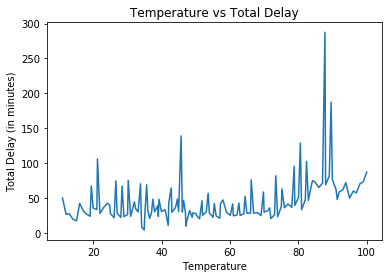

In [44]:
#Temperature vs Total delay
temp = weather_conditions_df.groupby(['temp'])['total_delay'].mean()
plt.plot(temp)
plt.xlabel("Temperature")
plt.ylabel("Total Delay (in minutes)")
plt.title('Temperature vs Total Delay')